In [12]:
include("include.jl")

LoadError: syntax: "%" is not a unary operator

In [22]:
function create_image(pdbFileNum, quatenionNum, saveFileName, config)
    # read structure and remove center of mass
    pdb = MDToolbox.readpdb("../model/0000$(pdbFileNum).pdb")
    MDToolbox.decenter!(pdb)

    # read quaternions
    quater = DelimitedFiles.readdlm("../quaternion/QUATERNION_LIST_576_Orient")

    # rotate by to a quaternion value
    pdb_rotated = MDToolbox.rotate(pdb, quater[quatenionNum, :])
    afmData = afmize_beta(pdb_rotated, config)
    
    @save saveFileName afmData
    return heatmap(afmData)
end

pdbFiles = [1 2 3 4]
quatenionNums = [7, 52, 91, 500]
fileNameList = []
plts = []
config = defaultConfig()
for i in 1:4
    saveFileName = @sprintf "testCase/afmize_pdb%02d_quaternion%04d.jld2" pdbFiles[i] quatenionNums[i]
    push!(plts, create_image(pdbFiles[i], quatenionNums[i], saveFileName, config))
    push!(fileNameList, saveFileName)
end
@save "testCase/fileNameList2.jld2" fileNameList

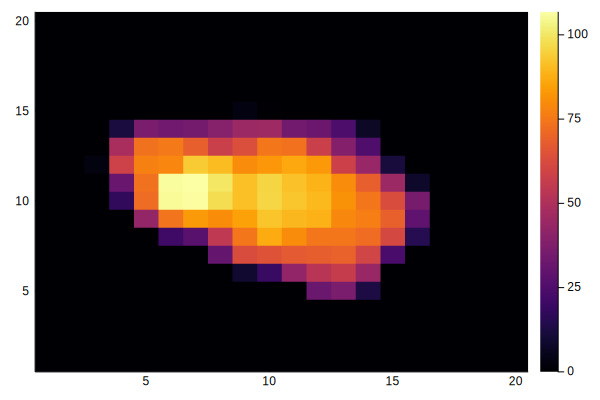

In [23]:
plts[1]

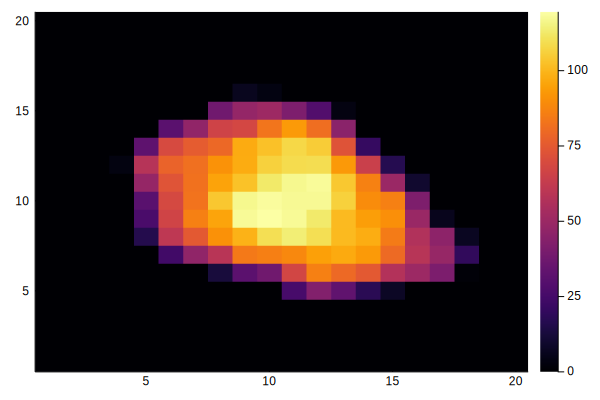

In [24]:
plts[2]

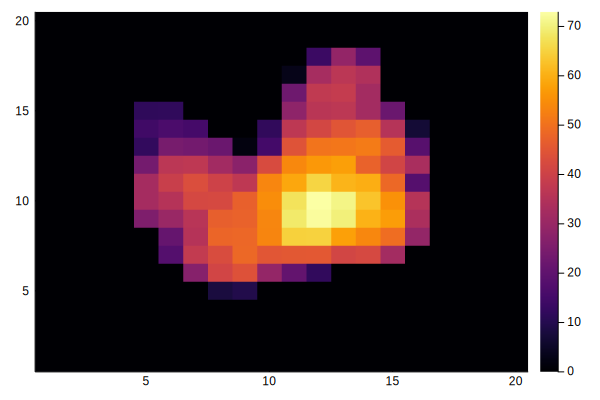

In [25]:
plts[3]

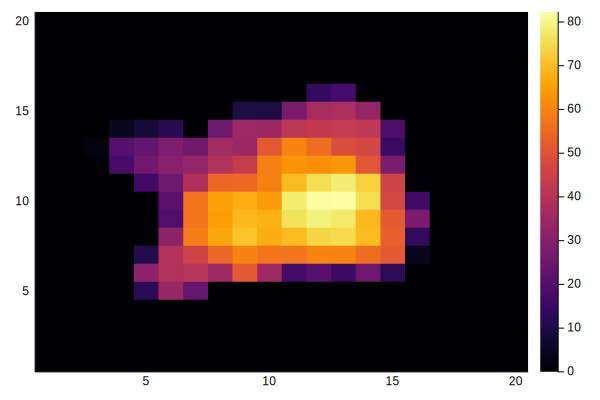

In [26]:
plts[4]